## Unified River Basin Modelling System (URBS)

**URBS Catchment Storage Model**

The model is designed to separate a catchment into subcatchments and define them.

$Scatch  = \left\{\frac{\beta \sqrt{k}A(1 + F) ^2}{(1 + U)^2}\right\} = Q^m$  


Where:

$Q$ = Outflow Discharge ($m^3$)

$\beta$ = Catchment Lag Parameter (hours)

$A$ = Area of the sub catchment ($km^2$)

$U$ = Fraction of the sub catchment urbanised

$F$ = Fraction of the sub catchment forested

$k$ = $\beta A^{b}$

$m$ = non-linearity parameter (0.6 to 0.8 typical)

Where:

$\beta$ = catchment lag parameter (hours)

$b$  = 0.5




### Example

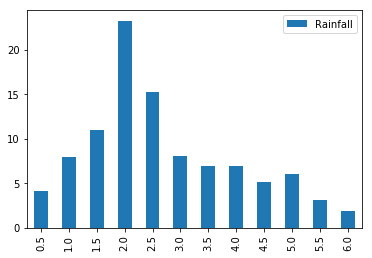

In [35]:
import pandas as pd
Time = [.5,1,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6]
Rainfall = {'Rainfall':[4.1, 8.0,11.0,23.3, 15.3, 8.1, 7.0, 7.0, 5.1 ,6.1 ,3.1 , 1.9]}
raindata = pd.DataFrame(Rainfall)
raindata.index = Time
raindata.plot.bar()

**Discharge**

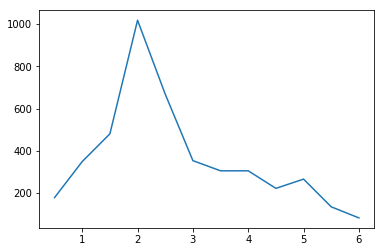

In [63]:
raindata['discharge'] =  (1/3600)*(0.001)*(10**6)*(raindata.Rainfall/0.5)*(78.7)
raindata['discharge'] = raindata['discharge']**1-0.5
raindata.discharge.plot()

**Parameters**

In [68]:
catchlag = 0.5
catcharea = 78.7
Urban = 0
Forested = 0
m = 0.6

In [69]:
import numpy as np
scatch = (catchlag*np.sqrt(1*78.7*0.5)*78.7*(1+Forested)**2)/(1+Urban)**2
scatch

246.84089080822895

In [70]:
raindata['net_Discharge'] = 0

for i in range(len(raindata)):
    scatch = scatch - raindata.discharge.iloc[i]
    print(scatch)
    if scatch < 0.0:
        raindata.net_Discharge.iloc[i] = scatch*-1
        print('switched')
        scatch = -1
    raindata.net_Discharge.iloc[i] = raindata.discharge.iloc[i]
raindata['net_Discharge'] = raindata['net_Discharge'].shift(1)

68.07977969711789
-281.19799808065983
switched
-481.44444444444434
switched
-1019.2277777777776
switched
-669.4499999999999
switched
-354.6499999999999
switched
-306.55555555555554
switched
-306.55555555555554
switched
-223.4833333333333
switched
-267.20555555555546
switched
-136.0388888888889
switched
-83.57222222222221
switched


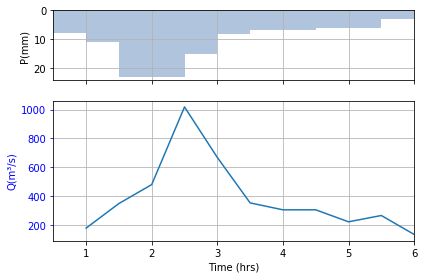

In [71]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
 
def plotHH(t,sP,sQ):
    fig = plt.figure()
    gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
     
    # HYDROGRAM CHART
    ax = plt.subplot(gs[1])
    ax.plot(t,sQ)
    ax.set_ylabel(u'Q(m³/s)', color='b')
    ax.set_xlabel('Time (hrs)')
    ax.tick_params(axis='y', colors='b')
    ax.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
    ax.yaxis.grid(b=True, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))
    #ax.set_ylim(0, max(sQ)*1.2)
 
    # PRECIPITATION/HYETOGRAPH CHART
    ax2 = plt.subplot(gs[0])
    ax2.bar(t, sP, 1, color='#b0c4de')
    ax2.xaxis.grid(b=True, which='major', color='.7', linestyle='-')
    ax2.yaxis.grid(b=True, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('P(mm)')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)
     
    plt.tight_layout()
    ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.show()
plotHH(raindata.index.values, raindata.Rainfall.values, raindata.net_Discharge.values)

**URBS River Storage Model**

$Schnl = \alpha f \frac{nL}{ \sqrt{S_{c}}} (x Q_{u} + ( 1 - x ) Q_{d} ) ^{n_{1}}$

Where:

$\alpha$  =  Channel lag parameter

$f$ = Reach length factor

$L$ = Length of reach (Km)

$S_{C}$ = Channel Slope

$Q_{u}$ = Inflow

$Q_{d}$ = Outflow

$x$ = Muskingum Translation Parameter

$n_{1}$ = Muskingum Non-linearity parameter

$n$ = Manning's N channel roughness

